# Supervised ML Model - zillow Dataset

In [1]:
# import dependencies
# sklearn is the Scikit-learn machine learning library for Python
import pandas as pd
import numpy as np
from datetime import datetime

import sqlite3
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

## Explore the data

In [2]:
# con = sqlite3.connect("finalprojectdatabase.db")
# zlw = pd.read_sql_query("SELECT * from zillow", con)
# zlw

In [3]:
file_path = "Resources/cleaned_zillow.csv"
zlw = pd.read_csv(file_path)
zlw.head()

,Address,City,Zipcode,bathrooms,bedrooms,daysOnZillow,homeType,latitude,livingArea,longitude,lotSize,date_sold,price,pricePerSquareFoot,rentZestimate,taxAssessedValue,taxAssessedYear,url,yearBuilt
0,2860 NE Blossom Hill Rd,Fairview,97024,3.0,3.0,25.0,TOWNHOUSE,45.543571,1806.0,-122.441765,1555.0,2021-05-21,315400,175.0,1950.0,273960.0,2020-01-01,https://www.zillow.com/homedetails/2860-NE-Blo...,2007-01-01
1,1121 SW 10th Dr,Gresham,97080,3.0,4.0,11.0,SINGLE_FAMILY,45.488228,2724.0,-122.444420,9583.0,2021-06-04,512000,188.0,1995.0,397560.0,2020-01-01,https://www.zillow.com/homedetails/1121-SW-10t...,1982-01-01
2,19309 NE Glisan St,Portland,97230,1.0,3.0,11.0,SINGLE_FAMILY,45.526634,1217.0,-122.464088,13939.0,2021-06-04,348000,286.0,1695.0,269520.0,2017-01-01,https://www.zillow.com/homedetails/19309-NE-Gl...,1953-01-01
3,1518 SE 12th St,Gresham,97080,2.0,3.0,14.0,SINGLE_FAMILY,45.487991,1150.0,-122.416184,7000.0,2021-06-01,404200,351.0,1800.0,309260.0,2020-01-01,https://www.zillow.com/homedetails/1518-SE-12t...,1967-01-01
4,110 NW Willowbrook Ct,Gresham,97030,2.0,3.0,25.0,SINGLE_FAMILY,45.498184,2036.0,-122.451332,6969.0,2021-05-21,478200,235.0,2250.0,373030.0,2020-01-01,https://www.zillow.com/homedetails/110-NW-Will...,1978-01-01


In [4]:
cols = zlw.columns.to_list()
print(cols)

['Address', 'City', 'Zipcode', 'bathrooms', 'bedrooms', 'daysOnZillow', 'homeType', 'latitude', 'livingArea', 'longitude', 'lotSize', 'date_sold', 'price', 'pricePerSquareFoot', 'rentZestimate', 'taxAssessedValue', 'taxAssessedYear', 'url', 'yearBuilt']


In [5]:
# drop columns not needed for machine learning
zlw = zlw.drop(['Address', 'date_sold', 'url', 'rentZestimate', 'latitude', 'longitude'], axis=1)
zlw.head()

,City,Zipcode,bathrooms,bedrooms,daysOnZillow,homeType,livingArea,lotSize,price,pricePerSquareFoot,taxAssessedValue,taxAssessedYear,yearBuilt
0,Fairview,97024,3.0,3.0,25.0,TOWNHOUSE,1806.0,1555.0,315400,175.0,273960.0,2020-01-01,2007-01-01
1,Gresham,97080,3.0,4.0,11.0,SINGLE_FAMILY,2724.0,9583.0,512000,188.0,397560.0,2020-01-01,1982-01-01
2,Portland,97230,1.0,3.0,11.0,SINGLE_FAMILY,1217.0,13939.0,348000,286.0,269520.0,2017-01-01,1953-01-01
3,Gresham,97080,2.0,3.0,14.0,SINGLE_FAMILY,1150.0,7000.0,404200,351.0,309260.0,2020-01-01,1967-01-01
4,Gresham,97030,2.0,3.0,25.0,SINGLE_FAMILY,2036.0,6969.0,478200,235.0,373030.0,2020-01-01,1978-01-01


array([[<AxesSubplot:title={'center':'Zipcode'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'daysOnZillow'}>,
        <AxesSubplot:title={'center':'livingArea'}>,
        <AxesSubplot:title={'center':'lotSize'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'pricePerSquareFoot'}>,
        <AxesSubplot:title={'center':'taxAssessedValue'}>]], dtype=object)

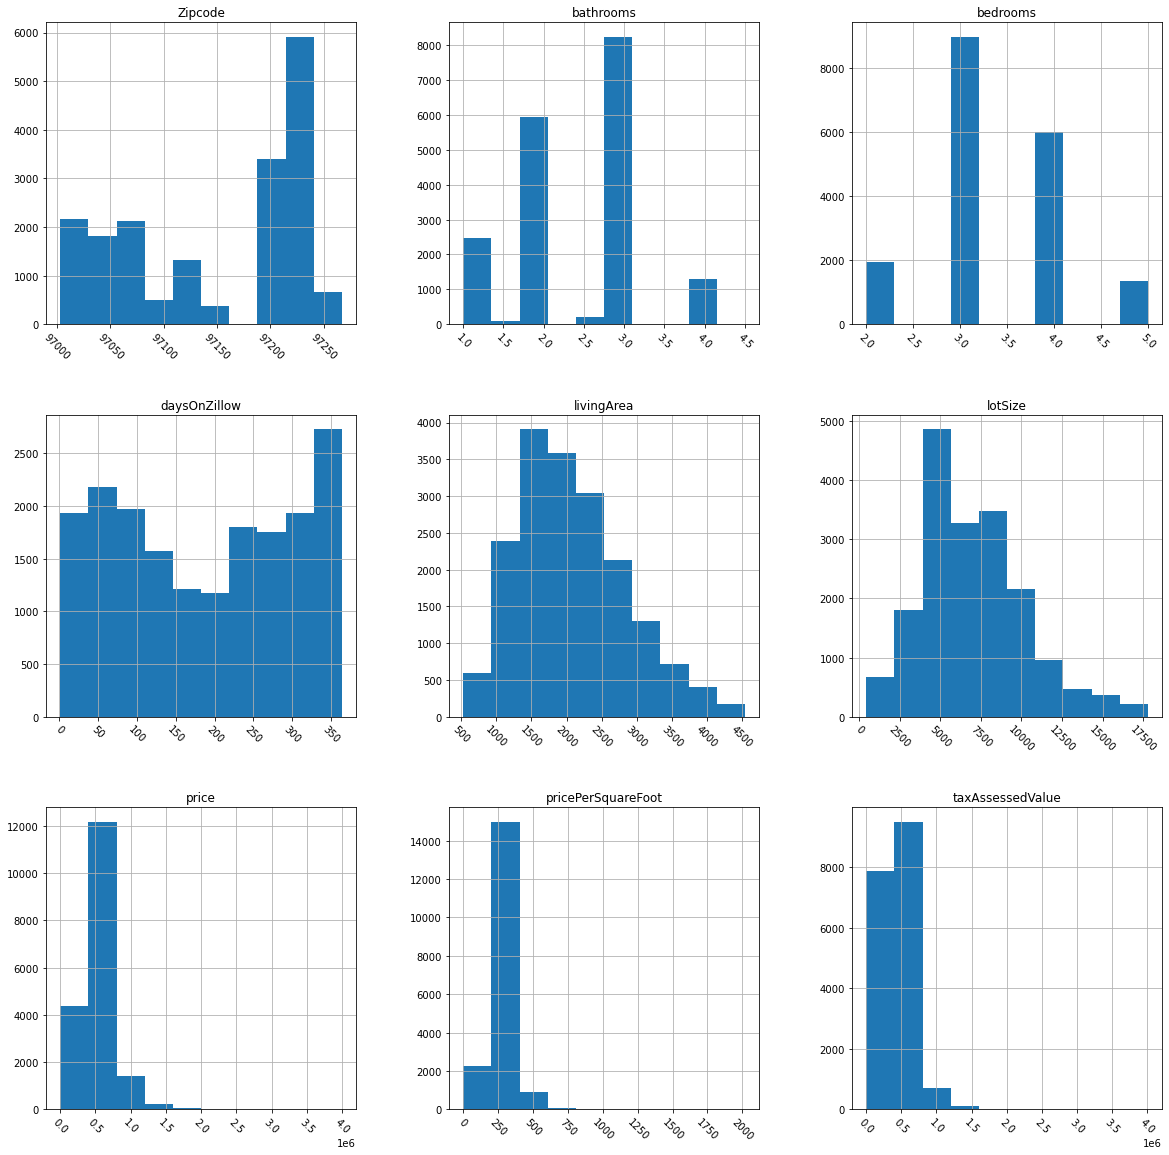

In [6]:
# view the initial, unfiltered dataset
zlw.hist(figsize=(20,20), xrot=-45)

In [7]:
zlw.describe()

,Zipcode,bathrooms,bedrooms,daysOnZillow,livingArea,lotSize,price,pricePerSquareFoot,taxAssessedValue
count,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,1.826500e+04,18265.000000,1.826500e+04
mean,97148.242431,2.460827,3.368191,187.579250,2078.627922,6852.924884,5.496832e+05,275.870298,4.636757e+05
std,86.271481,0.814036,0.769367,112.751753,765.683850,3171.615991,2.242703e+05,85.691069,1.899900e+05
min,97003.000000,1.000000,2.000000,1.000000,528.000000,421.000000,3.000000e+02,0.000000,9.500000e+02
25%,97062.000000,2.000000,3.000000,82.000000,1498.000000,4791.000000,4.100000e+05,225.000000,3.449300e+05
50%,97203.000000,3.000000,3.000000,192.000000,1978.000000,6534.000000,5.170000e+05,264.000000,4.260800e+05
75%,97221.000000,3.000000,4.000000,293.000000,2561.000000,8712.000000,6.335000e+05,313.000000,5.393100e+05
max,97267.000000,4.500000,5.000000,364.000000,4540.000000,17800.000000,4.000000e+06,2019.000000,4.008660e+06


In [8]:
zlw.dtypes

City                   object
Zipcode                 int64
bathrooms             float64
bedrooms              float64
daysOnZillow          float64
homeType               object
livingArea            float64
lotSize               float64
price                   int64
pricePerSquareFoot    float64
taxAssessedValue      float64
taxAssessedYear        object
yearBuilt              object
dtype: object

In [9]:
# set tax year and built year to float64 year only

#### Check for missing/duplicate/unnecessary data

In [10]:
for col in zlw.columns:
    print(f"Column {col} has {zlw[col].count()} rows.")

Column City has 18265 rows.
Column Zipcode has 18265 rows.
Column bathrooms has 18265 rows.
Column bedrooms has 18265 rows.
Column daysOnZillow has 18265 rows.
Column homeType has 18265 rows.
Column livingArea has 18265 rows.
Column lotSize has 18265 rows.
Column price has 18265 rows.
Column pricePerSquareFoot has 18265 rows.
Column taxAssessedValue has 18265 rows.
Column taxAssessedYear has 18265 rows.
Column yearBuilt has 18265 rows.


In [11]:
# Check for missing data 
# loop through null values
for col in zlw.columns:
    print(f"Column {col} has {zlw[col].isnull().sum()} null values.")

Column City has 0 null values.
Column Zipcode has 0 null values.
Column bathrooms has 0 null values.
Column bedrooms has 0 null values.
Column daysOnZillow has 0 null values.
Column homeType has 0 null values.
Column livingArea has 0 null values.
Column lotSize has 0 null values.
Column price has 0 null values.
Column pricePerSquareFoot has 0 null values.
Column taxAssessedValue has 0 null values.
Column taxAssessedYear has 0 null values.
Column yearBuilt has 0 null values.


In [12]:
# check for duplicate data
print(f"There are {zlw.duplicated().sum()} duplicate rows.")

There are 0 duplicate rows.


In [13]:
zlw.dtypes

City                   object
Zipcode                 int64
bathrooms             float64
bedrooms              float64
daysOnZillow          float64
homeType               object
livingArea            float64
lotSize               float64
price                   int64
pricePerSquareFoot    float64
taxAssessedValue      float64
taxAssessedYear        object
yearBuilt              object
dtype: object

## Begin Machine Learning

#### Processing
For data processing, the focus is on making sure the data is set up for the unsupervised learning model, which requires the following:
* Null values are handled.
* Only numerical data is used.
* Values are scaled. In other words, data has been manipulated to ensure that the variance between the numbers won't skew results.

In [14]:
#reference site for ML: https://towardsdatascience.com/predict-house-prices-with-machine-learning-5b475db4e1e

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sb

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, Lars, LassoLars, OrthogonalMatchingPursuit, BayesianRidge, ARDRegression, SGDRegressor, PassiveAggressiveRegressor, RANSACRegressor, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets, metrics
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, DotProduct, WhiteKernel
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

import pickle

### Numerical Features

In [ ]:
# split into numerical dataset here
zlw_num=zlw.drop(columns=['City',
                          #'Zipcode',
                          #'bathrooms',
                          #'bedrooms',
                          #'daysOnZillow',
                          'homeType',
                          #'livingArea',
                          #'lotSize',
                          #'price',
                          #'pricePerSquareFoot',
                          #'taxAssessedValue',
                         ])
zlw_num.dtypes

In [ ]:
zlw_num.head()

In [ ]:
# visualize the data
zlw_num.hist(figsize=(20,20), xrot=-45)

In [ ]:
# view distribution of the target variable (price)
sb.violinplot(data=zlw_num, x='price')
print(f"The median house price is ${(zlw_num.price.median()):,.2f}.")

In [ ]:
# view distribution of the lot size variable to check for outliers
sb.violinplot(data=zlw_num, x='lotSize')
print(f"The median lot size is {(zlw_num.lotSize.median()):.0f} sqft.")
print(f"The maximum lot size is {(zlw_num.lotSize.max()):.0f} sqft.")
print(f"The minimum lot size is {(zlw_num.lotSize.min()):.0f} sqft.")

In [ ]:
#correlation heatmap
# mask out upper triangle
mask = np.zeros_like(zlw_num.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# heatmap
sb.heatmap(zlw_num.corr()*100, 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask)

### Categorical Features

In [ ]:
zlw.dtypes[zlw.dtypes=='object']

In [ ]:
# split into categorical dataset
# dro address and url b/c they do not have an impact on ML
zlw_cat=zlw.drop(columns=[#'City',
                          'Zipcode',
                          'bathrooms',
                          'bedrooms',
                          'daysOnZillow',
                          #'homeType',
                          'livingArea',
                          'lotSize',
                          'price',
                          'pricePerSquareFoot',
                          'taxAssessedValue',
                         ])
zlw_cat.dtypes

In [ ]:
print(zlw.City.value_counts())
print(zlw.homeType.value_counts())
print(zlw.taxAssessedYear.value_counts())
print(zlw.yearBuilt.value_counts())

In [32]:
# hot encode categorical data
zlw = pd.get_dummies(zlw, columns = ['City', 'homeType', 'taxAssessedYear', 'yearBuilt'])
zlw.head()

KeyError: "['City', 'homeType'] not in index"

### Model the Data

In [ ]:
y = zlw.price
X = zlw.drop('price', axis=1)

In [ ]:
# split into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=573)
print(X_train.shape)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X,y)

In [ ]:
print(f'The intercept is: {model.intercept_}')
print(f'The slopes (coefficients for the variables are) are:\n')
coeff_df = pd.DataFrame(model.coef_, X.columns, columns = ['Coefficient'])
coeff_df

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# compare actual vs predicted
regr_df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
regr_df

#### Determine Error of the model
https://medium.com/@amanbamrah/how-to-evaluate-the-accuracy-of-regression-results-b38e5512afd3

https://machinelearningmastery.com/regression-metrics-for-machine-learning/

There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

* Mean Squared Error (MSE).
* Root Mean Squared Error (RMSE).
* Mean Absolute Error (MAE)

In [ ]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(f'The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.\n\nThe mean absolute error for this model is {MAE}.\n')
print(f'The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.\n\nThe mean squared error for this model is is {MSE}.\n')
print(f'The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.\n\nThe root mean squared error for this model is {RMSE}.')

Evaluating regression metrics: https://www.statology.org/how-to-interpret-rmse/

Evaluation of regression metrics are dependent on the dataset. In this case, it is reasonable to assume that an RMSE of 48276 (meaning that predicted price is off by $48,276 on average) results in a relatively accurate model. 

In [ ]:
#Notes: try w & w/o zestimate to see difference